# CUAI 과제#1 타이타닉 생존자 예측

### 라이브러리 임포트 및 탑승자 데이터 로딩

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#notebook에서 자료 바로 확인 
%matplotlib inline 


df = pd.read_csv('/Users/Jijoonghong/Downloads/train.csv') #데이터 불러오기
df.head(3) #데이터 앞부분 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터 칼럼 타입 확인

In [53]:
print('\n ### 학습 데이터 정보 ### \n')
print(df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 결측치 제거

- 나이 : 평균 나이

- 나머지 : N

In [54]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True)

print('결측치 갯수 : ', df.isnull().sum().sum())

결측치 갯수 :  0


### 피쳐들의 값 분류 확인

In [55]:
print('Sex값 분포 :\n', df['Sex'].value_counts())
print('Cabin값 분포 :\n', df['Cabin'].value_counts())
print('Embarked값 분포 :\n', df['Embarked'].value_counts())

Sex값 분포 :
 male      577
female    314
Name: Sex, dtype: int64
Cabin값 분포 :
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
E101             3
              ... 
D28              1
C103             1
B102             1
E63              1
B79              1
Name: Cabin, Length: 148, dtype: int64
Embarked값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 피쳐 정제 

- Cabin의 경우 선실 등급을 나타내는 첫 알파벳만 남기도록 함
- 빈부에 대한 차별이 강한 시절에 부에 따른 생존 가능성의 차이가 날 것

In [56]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


### 데이터 탐색1 
- 성별에 따른 생존자 확인 
- 성별과 재력에 따른 생존자 확인

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

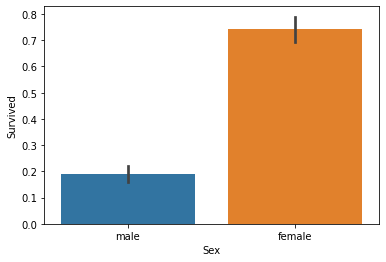

In [57]:
df.groupby(['Sex', 'Survived'])['Survived'].count()
sns.barplot(x = 'Sex', y = 'Survived', data = df)

결과 : 여성의 생존확률이 높음

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

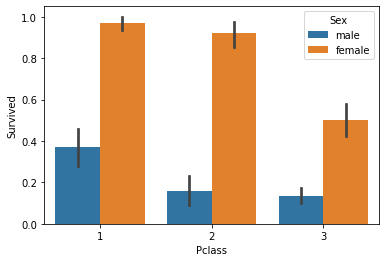

In [58]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

결과 : 여성의 생존확률이 높음, 3등실의 경우 여성의 생존율이 떨어짐

### 데이터 탐색2
- 나이에 따른 생존자 확인 

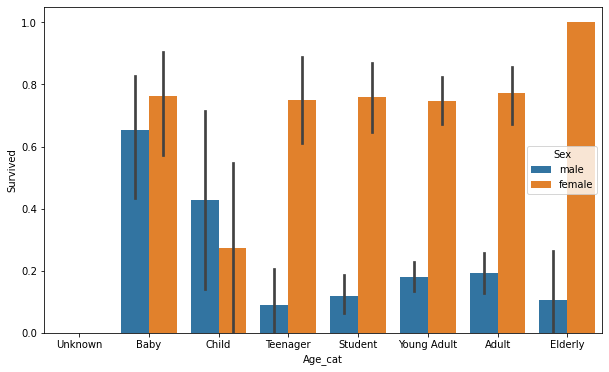

In [59]:
#lambda 활용 나이 범주화 

def get_category(age):
    
    a = ''
    
    if age <= -1: a = 'Unknown'
    elif age <= 5: a = 'Baby'
    elif age <= 12: a = 'Child'
    elif age <= 18: a = 'Teenager'
    elif age <= 25: a = 'Student'
    elif age <= 35: a = 'Young Adult'
    elif age <= 60: a = 'Adult'
    else : a = 'Elderly'
        
    return a

# 그래프 설정
plt.figure(figsize=(10, 6)) #피규어 사이즈 더 크게 설정
grp_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'] #순서지정

#람다 식에 get_category를 리턴 값으로 지정
#에이지 열의 값을 받아 해당하는 카테고리 반환
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data = df, order = grp_names)
df.drop('Age_cat', axis=1, inplace = True)

결과 

- 여자 baby는 생존확률이 높았지만 child의 경우 타 연령대에 비해 낮음
- 여자 senior는 매우 생존 확률이 높음
- 즉 sex, age, pclass는 생존을 좌우하는 피쳐

### 문자형 카테고리 인코딩

In [60]:
from sklearn import preprocessing

def encode_features(data):
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        l = preprocessing.LabelEncoder()
        l = l.fit(data[feature])
        data[feature] = l.transform(data[feature])
        
    return data

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### Feature 가공 내역 함수화

In [61]:
#결측치 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna('0', inplace = True)

    return df

# 불필요한 속성 제거
def format_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
    
    return df

# 레이블 인코딩
def drop_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        l = preprocessing.LabelEncoder()
        l = l.fit(df[feature])
        df[feature] = l.transform(df[feature])
        
    return df

# 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

### 원본 데이터 재로딩 및 재가공
- Survived 속성만 별도 분리하여 클래스 결정값 데이터셋 생성
- 이외의 피처로 피처 데이터셋 생성
- 피처 데이터셋에 전처리

In [62]:
df = pd.read_csv('/Users/Jijoonghong/Downloads/train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis = 1)

x_df = transform_features(x_df)
x_df.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3


### 트레인셋에서 테스트셋 추출하기
- 20% 추출

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 11)

### 예측하고 평가하기
- 결정 트리
- 랜덤 포레스트
- 로지스틱 회귀

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))



DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/Users/jijoonghong/opt/anaconda3/envs/finda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차검증하기 - Decision Tree
- KFold, K = 5
- Cross_val_score()
- GridSearchCV

In [65]:
# KFold 클래스
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_df.values[train_index], x_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [66]:
# cross_val_score() 클래스
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4}'.format(iter_count, accuracy))
    
print('평균 정확도: {:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.743
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [67]:
# GridSearchCV() 클래스
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]
             }

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print(f'GridSearchCV 최적 하이퍼 파라미터: {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도: {round(grid_dclf.best_score_, 4)}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도: {round(accuracy, 4)}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


### 성별에 따라 생존자를 에측하는 단순한 Classifer 생성

- Accuracy = $correct \over correct + incorrect $


- 위의 예측 결과가 80%대였지만 애초에 여자인 경우 생존확률이 높아 별도의 알고리즘 없이도 예측이 가능함
- 남녀 기준만으로 생존 유무를 판단하는 Classifier로 정확도의 왜곡 확인이 이 챕터의 골자임
- fit() 메서드는 아무것도 수행하지 않음
- predict 메서드는 단순히 피처가 1이면 0, 그렇지 않으면 1로 예측

In [68]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
                
        return pred

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#원본 데이터 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
df = pd.read_csv('/Users/Jijoonghong/Downloads/train.csv')
y_df = df["Survived"]
x_df = df.drop(["Survived"], axis = 1)
x_df = transform_features(x_df)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 0)

#Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
print(f'DummyClassifier의 DecisionTreeClassifier 정확도: {round(accuracy, 4)}')


DummyClassifier의 DecisionTreeClassifier 정확도: 0.8715


### 결론

- 위와 같이 단순한 알고리즘으로 예측하더라도 데이터 구성에 따라 정확도가 높다
- 그러므로 정확도를 평가지표로 사용해야 할 때는 매우 신중해야함
- 특히 불균형한 레이블 값 분포에서 성능 판단시 적합한 평가지표가 아님
- 예) 100개 중 0이 90개, 1이 10개인 데이터에서 무조건 0으로 반환했을 때는 정확도가 90%